# Naive Bayes
__MATH 3480__ - Dr. Michael Olson

Reading:
* [YouTube: 3 Blue 1 Brown on Bayes' Theorem](https://www.youtube.com/watch?v=HZGCoVF3YvM)

-----

We should be in the middle of Project 1.
* Discuss the project

-----

We are now going to switch to performing models with `sklearn`. Remember the models that we have discussed in our Machine Learning Landscape:

![Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/refs/heads/main/Notes/Images/3480_ML_Landscape.png)

We're going to start with Supervised models (discrete then continuous), then we'll move to unsupervised models (discrete then continuous) and finish with the Large Language Models (LLM).

-----
## Bayes' Theorem
Recall Bayes' Theorem:
$$P(y|X) = \frac{P(y)P(X|y)}{P(X)}$$

To remind ourselves of how Bayes' Theorem works, let's consider this example:
><br>The Ford Siesta is produced at 3 different facilities (A, B, and C). After the 2025 Siesta is released, there is news that the front bumper of some Siestas is defective. So, you do a little research and find the following:
>
> | Facility |   A   |   B   |   C   |
> | :------: | :---: | :---: | :---: |
> | Cars Produced | 125 | 85 | 170 |
> | Defective Bumpers | 10 | 7 | 13 |
>
> Your car came from Facility A. What is the probability that your bumper is defective?
>
> $$P(Defective | A) = \frac{P(A | Defective)P(Defective)}{P(A)} = \frac{\tfrac{10}{30}\tfrac{30}{380}}{\tfrac{125}{380}} = \frac{10}{125} = 0.08$$
><br>

Here is a look at another car example. Notice in this example that we may not have all of the information. $P(X)$ is often not known, but since it doesn't depend on $y$, it will be the same for all calculations.

> <br>The Dodge Ewe is produced at 3 different facilities (R, S, T). After the 2025 Ewe is released, there is news that the windshilds may be defective. As a researcher on the Dodge team, you are trying to find out which facility is most likely obtaining bad windshields.
>
> | Facility |   R   |   S   |   T   |
> | :------: | :---: | :---: | :---: |
> | Cars Produced | 180 | 145 | 225 |
> | Defective Bumpers | 5% | 7% | 6% |
>
> Although we could figure out the exact number of defective bumpers, you'll see that we don't have to.
> 
> $$P(R | Defective) = \frac{P(Defective|R)P(R)}{P(Defective)} = \frac{0.05\tfrac{180}{550}}{P(Defective)} = \frac{0.01636}{P(Defective)}$$
> $$P(S | Defective) = \frac{P(Defective|S)P(S)}{P(Defective)} = \frac{0.07\tfrac{145}{550}}{P(Defective)} = \frac{0.01845}{P(Defective)}$$
> $$P(T | Defective) = \frac{P(Defective|T)P(T)}{P(Defective)} = \frac{0.06\tfrac{225}{550}}{P(Defective)} = \frac{0.02455}{P(Defective)}$$
>
> From this, the highest probability indicates that facility C has sourced defective windshields.
><br>&nbsp;

Notice that we didn't completely solve these probabilities. However, notice that $P(Defective)$ is the same for all facilities, so the facility with the largest numerator will still have the highest probability once the final number is calculated. So, there is no need to do any more.


## The Naive Bayes Algorithm

The Naive Bayes algorithm utilizes Bayes Theorem to determine the probabilities of a data point being in a given group. As in the Dodge Ewe example, the 

* Why is it called "Naive"?

A couple of terms to look at:
* $P(y|X)$ is known as the __Posterior__
    * Probability of outcome $y$ after looking at the conditions $X$ (after being why it's called "Posterior")
* $P(y)$ is known as the __Prior__
    * The probability (known prior to the problem) of having the outcome $y$
* $P(X|y)$ is known as the __likelihood__
    * The chances (or likelihood) that someone/something in outcome $y$ has the conditions $X$ 
* $P(X)$ is known as the __Marginal likelihood__.

But what are $y$ and $X$ exactly?
* The $y$ is the category for which we want a probability. In essence, this is the hypothesis of our problem.
$$P(Hypothesis | X) = \frac{P(X | Hypothesis)P(Hypothesis)}{P(X)}$$
* $X$ is the dataset we are using to determine the probability of the hypothesis, so they are like the evidence of our problem. The features of this dataset are the conditions of the problem. 
$$P(Hypothesis | Evidence) = \frac{P(Evidence | Hypothesis)P(Hypothesis)}{P(Evidence)}$$


* A specific situation (like which branch of a store someone attends based on where they live) or something along those lines
    * Create graphs of
        * Scatterplot colored by which branch they go to
        * Add a point we want to predict (color grey)
        * Color a circle around the desired datapoint (marginal likelihood)

-----

Let's look at an example with weather and golf. Below is a dataset of weather conditions. We want to create a model to predict whether someone will go golfing or not given certain weather conditions. Here is a small dataset we can follow:

| outlook  | temperature | humidity | windy | play |
|----------|-------------|----------|-------|------|
| overcast | hot         | high     | FALSE | yes  |
| overcast | cool        | normal   | TRUE  | yes  |
| overcast | mild        | high     | TRUE  | yes  |
| overcast | hot         | normal   | FALSE | yes  |
| rainy    | mild        | high     | FALSE | yes  |
| rainy    | cool        | normal   | FALSE | yes  |
| rainy    | cool        | normal   | TRUE  | no   |
| rainy    | mild        | normal   | FALSE | yes  |
| rainy    | mild        | high     | TRUE  | no   |
| sunny    | hot         | high     | FALSE | no   |
| sunny    | hot         | high     | TRUE  | no   |
| sunny    | mild        | high     | FALSE | no   |
| sunny    | cool        | normal   | FALSE | yes  |
| sunny    | mild        | normal   | TRUE  | yes  |

What's the probability that a golfer plays on a rainy day with mild temperatures?
* Let $X$ be the conditions (outlook = rainy and temperature = mild)
* Let $y$ be the outcome (play)
* Of the 14 records, 3 show rainy and mild temperatures: $P(X) = 3/14$
* Of the 14 records, 9 played golfe: $P(y) = 9/14$
* Of the 9 records that played golf, 2 were rainy and mild $P(X|y) = 2/9$

$$P(play|rainy and mild) = P(y|X) = \frac{P(y)P(X|y)}{P(X)} = \frac{(9/14)(2/9)}{(3/14)} = \frac{2}{3} = 0.666667$$

In [1]:
import pandas as pd

data = [
    {"outlook": "overcast", "temperature": "hot",   "humidity": "high",    "windy": False,  "play": "yes"},
    {"outlook": "overcast", "temperature": "cool",  "humidity": "normal",  "windy": True,   "play": "yes"},
    {"outlook": "overcast", "temperature": "mild",  "humidity": "high",    "windy": True,   "play": "yes"},
    {"outlook": "overcast", "temperature": "hot",   "humidity": "normal",  "windy": False,  "play": "yes"},
    {"outlook": "rainy",    "temperature": "mild",  "humidity": "high",    "windy": False,  "play": "yes"},
    {"outlook": "rainy",    "temperature": "cool",  "humidity": "normal",  "windy": False,  "play": "yes"},
    {"outlook": "rainy",    "temperature": "cool",  "humidity": "normal",  "windy": True,   "play": "no"},
    {"outlook": "rainy",    "temperature": "mild",  "humidity": "high",    "windy": True,   "play": "no"},
    {"outlook": "rainy",    "temperature": "mild",  "humidity": "normal",  "windy": False,  "play": "yes"},
    {"outlook": "sunny",    "temperature": "hot",   "humidity": "high",    "windy": False,  "play": "no"},
    {"outlook": "sunny",    "temperature": "hot",   "humidity": "high",    "windy": True,   "play": "no"},
    {"outlook": "sunny",    "temperature": "mild",  "humidity": "high",    "windy": False,  "play": "no"},
    {"outlook": "sunny",    "temperature": "cool",  "humidity": "normal",  "windy": False,  "play": "yes"},
    {"outlook": "sunny",    "temperature": "mild",  "humidity": "normal",  "windy": True,   "play": "yes"}
]

weather = pd.DataFrame(data)
display(weather)

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,high,True,no
8,rainy,mild,normal,False,yes
9,sunny,hot,high,False,no


c:\Users\michael.olson2\.virtualenvs\MachineLearning\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Axes: title={'center': 'outlook = sunny | temperature = mild'}, xlabel='play', ylabel='count'>

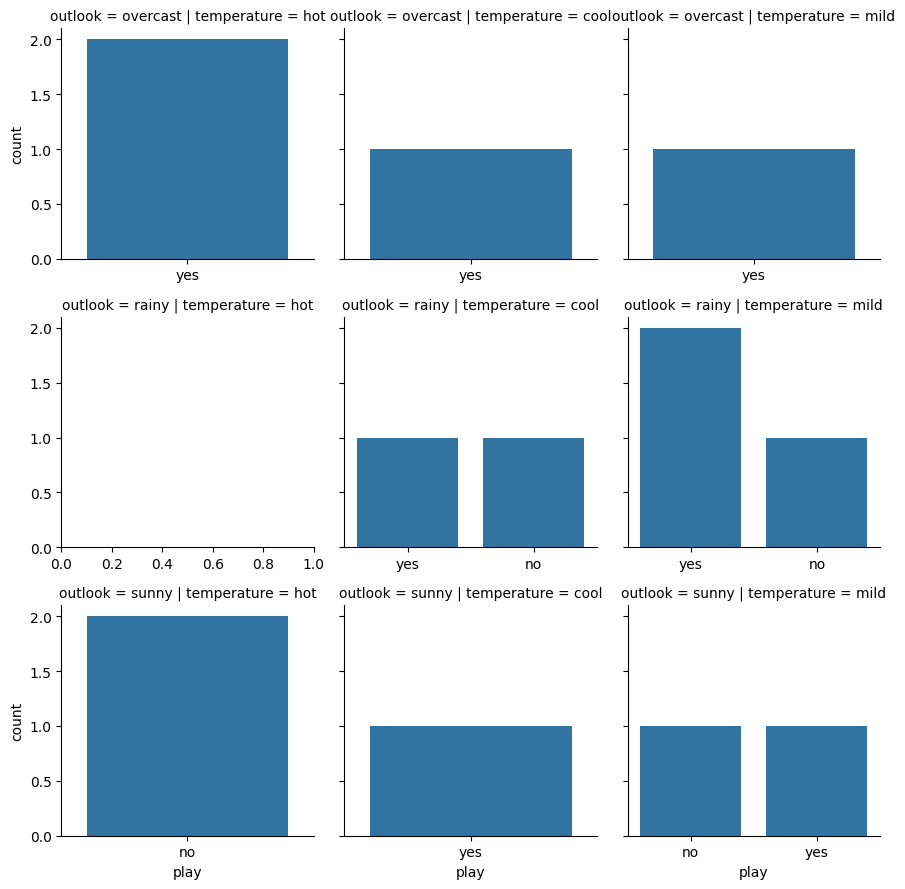

In [2]:
import seaborn as sns

g = sns.FacetGrid(weather, row='outlook', col='temperature', sharex=False)
g.map(sns.countplot, 'play', dodge=True)
sns.countplot()

In [3]:
weather_len = len(weather)
X_len = len(weather[(weather['outlook'] == 'rainy') & (weather['temperature'] == 'mild')])
Xy_len = len(weather[(weather['outlook'] == 'rainy') & (weather['temperature'] == 'mild') & (weather['play'] == 'yes')])
y_len = len(weather[weather['play'] == 'yes'])
print(f"weather = {weather_len}, X = {X_len}, y = {y_len}, Xy = {Xy_len}")

pX = X_len / weather_len
pXy = Xy_len / y_len
py = y_len / weather_len

pyX = pXy * py / pX

print(f"P(play=yes | outlook=rainy, temperature=mild) = {pyX}")

weather = 14, X = 3, y = 9, Xy = 2
P(play=yes | outlook=rainy, temperature=mild) = 0.6666666666666666


In [4]:
def play(conditions,status,playgolf):
    """
    Input: conditions - list of weather conditions (e.g. ['outlook', 'temperature'])
           status - list of corresponding status for each condition (e.g. ['rainy', 'mild'])
           playgolf - 'yes' or 'no'
    """
    py = len(weather[weather['play'] == playgolf]) / len(weather)
    weather_filtered = weather.copy()
    for cond,stat in zip(conditions,status):
           weather_filtered = weather_filtered[weather_filtered[cond] == stat]
    pX = len(weather_filtered) / len(weather)
    pXy = len(weather_filtered[weather_filtered['play'] == playgolf]) / len(weather[weather['play'] == playgolf])
    
    pyX = pXy * py / pX
    
    conds = ''
    for c,s in zip(conditions,status):
        conds += f"{c} = {s}, "
    print(f"P(play = {playgolf} | {conds[:-2]}) = {pyX}")

In [5]:
play(['outlook','temperature'],['rainy','mild'],'yes')
play(['outlook','humidity'],['sunny','high'],'no')
play(['windy'],[True],'no')

P(play = yes | outlook = rainy, temperature = mild) = 0.6666666666666666
P(play = no | outlook = sunny, humidity = high) = 1.0
P(play = no | windy = True) = 0.5


## Preprocessing
Before we do any calculations, we have to do the preprocessing
1. Missing Data - No missing values in this example
2. Encode Categorical Variables - Everything needs to be encoded
3. Split the data - See the test dataset below
4. Feature Scaling - Our conditions are already on the same scale, so we can skip this

Here's a testing dataset:
| outlook  | temperature | humidity | windy | play |
|----------|-------------|----------|-------|------|
| sunny    | hot         | normal   | FALSE | yes  |
| overcast | cool        | high     | FALSE | yes  |
| rainy    | hot         | normal   | TRUE  | no   |
| sunny    | cool        | high     | TRUE  | no   |
| overcast | mild        | normal   | FALSE | yes  |
| rainy    | mild        | normal   | TRUE  | no   |
| sunny    | mild        | normal   | FALSE | yes  |
| overcast | hot         | high     | TRUE  | yes  |
| rainy    | cool        | high     | FALSE | yes  |
| sunny    | hot         | high     | FALSE | no   |

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

weather_encoded = weather.copy()

oe_play = OrdinalEncoder(categories=[['no','yes']])
y = oe_play.fit_transform(weather['play'].values.reshape(-1,1))

weather_encoded = weather_encoded.drop('play', axis=1)

oe_outlook = OrdinalEncoder(categories=[['sunny','overcast','rainy']])
oe_temp = OrdinalEncoder(categories=[['cool','mild','hot']])
oe_humidity = OrdinalEncoder(categories=[['normal','high']])
oe_windy = OrdinalEncoder(categories=[[False,True]])

weather_encoded['outlook'] = oe_outlook.fit_transform(weather[['outlook']])
weather_encoded['temperature'] = oe_temp.fit_transform(weather[['temperature']])
weather_encoded['humidity'] = oe_humidity.fit_transform(weather[['humidity']])
weather_encoded['windy'] = oe_windy.fit_transform(weather[['windy']])

X = weather_encoded.to_numpy()
X

## Model
With the data preprocessed, let's train the Naive Bayes model

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X,y) 


In [ ]:
model.predict_proba([[2,1,0,1]])  # rainy, mild, normal, windy

## Evaluate
Now that we have our model, we can evaluate it on our test data

In [ ]:
# Test Data
test_data = [
    {"outlook": "sunny", "temperature": "hot", "humidity": "normal", "windy": False, "play": "yes"},
    {"outlook": "overcast", "temperature": "cool", "humidity": "high", "windy": False, "play": "yes"},
    {"outlook": "rainy", "temperature": "hot", "humidity": "normal", "windy": True, "play": "no"},
    {"outlook": "sunny", "temperature": "cool", "humidity": "high", "windy": True, "play": "no"},
    {"outlook": "overcast", "temperature": "mild", "humidity": "normal", "windy": False, "play": "yes"},
    {"outlook": "rainy", "temperature": "mild", "humidity": "normal", "windy": True, "play": "no"},
    {"outlook": "sunny", "temperature": "mild", "humidity": "normal", "windy": False, "play": "yes"},
    {"outlook": "overcast", "temperature": "hot", "humidity": "high", "windy": True, "play": "yes"},
    {"outlook": "rainy", "temperature": "cool", "humidity": "high", "windy": False, "play": "yes"},
    {"outlook": "sunny", "temperature": "hot", "humidity": "high", "windy": False, "play": "no"}
]
test_weather = pd.DataFrame(test_data)
y_test = oe_play.transform(test_weather.pop('play').values.reshape(-1,1))

test_weather['outlook'] = oe_outlook.transform(test_weather[['outlook']])
test_weather['temperature'] = oe_temp.transform(test_weather[['temperature']])
test_weather['humidity'] = oe_humidity.transform(test_weather[['humidity']])
test_weather['windy'] = oe_windy.transform(test_weather[['windy']])
X_test = test_weather.to_numpy()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = model.predict(X_test)

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# Confusion Matrix
confusion = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(confusion)

In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

#### Create our own model
(This is code for a previous lecture. I'm keeping for now)

> <br>The Dodge Ewe is produced at 3 different facilities (R, S, T). After the 2025 Ewe is released, there is news that the windshilds may be defective. As a researcher on the Dodge team, you are trying to find out which facility is most likely obtaining bad windshields.
>
> | Facility |   R   |   S   |   T   |
> | :------: | :---: | :---: | :---: |
> | Cars Produced | 180 | 145 | 225 |
> | Defective Bumpers | 5% | 7% | 6% |
>
> &nbsp;

$$P(R | Defective) = \frac{P(Defective|R)P(R)}{P(Defective)} = \frac{0.05\tfrac{180}{550}}{P(Defective)} = \frac{0.01636}{P(Defective)}$$
$$P(S | Defective) = \frac{P(Defective|S)P(S)}{P(Defective)} = \frac{0.07\tfrac{145}{550}}{P(Defective)} = \frac{0.01845}{P(Defective)}$$
$$P(T | Defective) = \frac{P(Defective|T)P(T)}{P(Defective)} = \frac{0.06\tfrac{225}{550}}{P(Defective)} = \frac{0.02455}{P(Defective)}$$

In [ ]:
import numpy as np
import pandas as pd

class NaiveBayes():
    """
    Naive Bayes Machine Learning Algorithm

    Use this for a problem where 
    Input: list of facilities, array of counts, array of rates
    """
    def fit_predict(self, f, cp, db):
        self.probabilities = pd.Series(index=f)
        for facility,p,b in zip(f,cp,db):
            self.probabilities[facility] = b*(p/sum(cp))
        return self.probabilities[self.probabilities == self.probabilities.max()].index[0]

In [ ]:
facilities = ['R','S','T']
cars_produced = [180, 145, 225]
defective_bumpers = [0.05, 0.07, 0.06]

cars = NaiveBayes()
cars.fit_predict(facilities, cars_produced, defective_bumpers)

In [ ]:
numbers = pd.DataFrame({
    'Condition 1':[0,0,1,0,2,1,0,2,2,1,0,0,2,2,1,2,0,2,1,0,1,1,2,2,0,0,1,0,2],
    'Condition 2':[0,1,2,0,2,1,2,0,1,0,1,2,0,2,0,1,2,1,2,0,0,1,0,2,0,2,2,0,0],
    'Diagnosis'  :[0,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,1,1,0,1,0,0,0]
})

possible_conditions = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2']
conditions = pd.Series(index=possible_conditions)
diagnosis = pd.DataFrame(columns=['0','1'], index=possible_conditions)

for i in range(3):
    for j in range(3):
        idx = str(i) + ',' + str(j)
        conditions[idx] = len(numbers[(numbers['Condition 1'] == i) & (numbers['Condition 2'] == j)])
        for d in range(2):
            diagnosis.loc[idx, str(d)] = len(numbers[(numbers['Condition 1'] == i) &
                                                      (numbers['Condition 2'] == j) &
                                                        numbers['Diagnosis'] == d])/len(numbers['Diagnosis'])

nb = NaiveBayes()
nb.fit_predict(possible_conditions, conditions, diagnosis['0'])

In [ ]:
len(numbers[(numbers['Condition 1'] == 0) & (numbers['Condition 2'] == 0)])